In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load and Check Data

In [2]:
train=pd.read_csv("train.csv")

In [3]:
train

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ
...,...,...,...,...,...,...
44995,60461435,Convert List<String> to string C# - asp.net - ...,<p>I am new to this and I am asking for help t...,<c#><asp.net><sql-server>,2020-02-29 02:22:18,LQ_CLOSE
44996,60461754,Does Python execute code from the top or botto...,<p>I am working on learning Python and was won...,<python>,2020-02-29 03:33:59,LQ_CLOSE
44997,60462001,how to change payment date in Azure?,<p>It looks like it costs 8 days per month in ...,<azure><billing>,2020-02-29 04:34:16,LQ_CLOSE
44998,60465318,how to implement fill in the blank in Swift,"<p>""I _____ any questions.""</p>\n\n<p>I want t...",<ios><swift>,2020-02-29 12:50:43,LQ_CLOSE


#  Variable Descriptions

In [4]:
train['Y'].value_counts()

LQ_CLOSE    15000
HQ          15000
LQ_EDIT     15000
Name: Y, dtype: int64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            45000 non-null  int64 
 1   Title         45000 non-null  object
 2   Body          45000 non-null  object
 3   Tags          45000 non-null  object
 4   CreationDate  45000 non-null  object
 5   Y             45000 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


# Feature Selection/Engineering

In [6]:
train=train[['Body','Y']]

In [7]:
train

,Body,Y
0,<p>I'm already familiar with repeating tasks e...,LQ_CLOSE
1,<p>I'd like to understand why Java 8 Optionals...,HQ
2,<p>I am attempting to overlay a title over an ...,HQ
3,"<p>The question is very simple, but I just cou...",HQ
4,<p>I'm using custom floatingactionmenu. I need...,HQ
...,...,...
44995,<p>I am new to this and I am asking for help t...,LQ_CLOSE
44996,<p>I am working on learning Python and was won...,LQ_CLOSE
44997,<p>It looks like it costs 8 days per month in ...,LQ_CLOSE
44998,"<p>""I _____ any questions.""</p>\n\n<p>I want t...",LQ_CLOSE


# Removing \<p> and Punctuations from body of the text

In [8]:
train['Body']=train['Body'].str.replace('<p>','')

<ipython-input-8-81fbe7c0cdc1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Body']=train['Body'].str.replace('<p>','')


In [9]:
train['Body']

0        I'm already familiar with repeating tasks ever...
1        I'd like to understand why Java 8 Optionals we...
2        I am attempting to overlay a title over an ima...
3        The question is very simple, but I just could ...
4        I'm using custom floatingactionmenu. I need to...
                               ...                        
44995    I am new to this and I am asking for help to c...
44996    I am working on learning Python and was wonder...
44997    It looks like it costs 8 days per month in Azu...
44998    "I _____ any questions."</p>\n\nI want to impl...
44999    I'm very new to programming and I'm teaching m...
Name: Body, Length: 45000, dtype: object

In [10]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text=text.lower().replace(punctuation,'')
        return text
train['Body'].apply(remove_punctuations)
train['Body']

0        I'm already familiar with repeating tasks ever...
1        I'd like to understand why Java 8 Optionals we...
2        I am attempting to overlay a title over an ima...
3        The question is very simple, but I just could ...
4        I'm using custom floatingactionmenu. I need to...
                               ...                        
44995    I am new to this and I am asking for help to c...
44996    I am working on learning Python and was wonder...
44997    It looks like it costs 8 days per month in Azu...
44998    "I _____ any questions."</p>\n\nI want to impl...
44999    I'm very new to programming and I'm teaching m...
Name: Body, Length: 45000, dtype: object

# Converting Target Variable into Numerical Type

In [11]:
temp = {'LQ_CLOSE': 0,'LQ_EDIT': 1,'HQ': 2} 

In [12]:
train.Y = [temp[item] for item in train.Y] 

C:\Users\Mudit\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [13]:
train.Y=train.Y.astype('int')

In [14]:
train.Y.value_counts()

2    15000
1    15000
0    15000
Name: Y, dtype: int64

C:\Users\Mudit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Y', ylabel='count'>

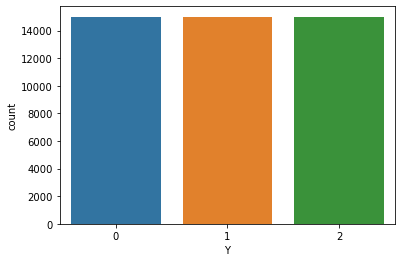

In [15]:
sns.countplot(train['Y'])

# Importing Stopwords and removing them from body

In [16]:
import nltk
from nltk.corpus import stopwords
import re
import nltk as nlp
nltk.download('stopwords') 
nltk.download('punkt')
nltk.download('wordnet') 

lemma = nlp.WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mudit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mudit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mudit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [17]:
text_list = []
for description in train.Body:
    
    description = re.sub('[^a-zA-Z]',' ',description)
    description = nltk.word_tokenize(description)
    description = ' '.join(description)
    text_list.append(description)

In [18]:
len(text_list)

45000

# Count-Vectorizing the text data

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
max_features = 300

count_vectorizer = CountVectorizer(max_features=max_features,stop_words = "english")

space_matrix = count_vectorizer.fit_transform(text_list).toarray()  

In [20]:
space_matrix.shape

(45000, 300)

# Train Test Split

In [21]:
y = train.iloc[:,1].values   
x = space_matrix

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 42)
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (40500, 300)
X_test shape (4500, 300)
y_train shape (40500,)
y_test shape (4500,)


# Importing the Models

In [22]:
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestRegressor , RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

# Logistic Regression

In [23]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
predlr=lr.predict(X_test)
print(confusion_matrix(y_test,predlr))
print("\n")
print(classification_report(y_test,predlr))

[[1021  233  207]
 [ 129 1368   34]
 [ 309   79 1120]]


              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1461
           1       0.81      0.89      0.85      1531
           2       0.82      0.74      0.78      1508

    accuracy                           0.78      4500
   macro avg       0.78      0.78      0.78      4500
weighted avg       0.78      0.78      0.78      4500



C:\Users\Mudit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest

In [24]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
predrf=rf.predict(X_test)
print(confusion_matrix(y_test,predrf))
print("\n")
print(classification_report(y_test,predrf))

[[1030  202  229]
 [ 134 1367   30]
 [ 250   70 1188]]


              precision    recall  f1-score   support

           0       0.73      0.70      0.72      1461
           1       0.83      0.89      0.86      1531
           2       0.82      0.79      0.80      1508

    accuracy                           0.80      4500
   macro avg       0.79      0.80      0.79      4500
weighted avg       0.80      0.80      0.80      4500



# KNN

In [25]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
predknn=knn.predict(X_test)
print(confusion_matrix(y_test,predknn))
print("\n")
print(classification_report(y_test,predknn))

[[1029  197  235]
 [ 406 1083   42]
 [ 558   95  855]]


              precision    recall  f1-score   support

           0       0.52      0.70      0.60      1461
           1       0.79      0.71      0.75      1531
           2       0.76      0.57      0.65      1508

    accuracy                           0.66      4500
   macro avg       0.69      0.66      0.66      4500
weighted avg       0.69      0.66      0.66      4500



# Decision Tree

In [26]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
preddt=dt.predict(X_test)
print(confusion_matrix(y_test,preddt))
print("\n")
print(classification_report(y_test,preddt))

[[ 920  214  327]
 [ 230 1205   96]
 [ 342   90 1076]]


              precision    recall  f1-score   support

           0       0.62      0.63      0.62      1461
           1       0.80      0.79      0.79      1531
           2       0.72      0.71      0.72      1508

    accuracy                           0.71      4500
   macro avg       0.71      0.71      0.71      4500
weighted avg       0.71      0.71      0.71      4500



# Graph for accuracy of different ML Models

In [27]:
ML_results = []
from sklearn.metrics import f1_score
ML_results.append(f1_score(y_test,predlr,average='macro'))
ML_results.append(f1_score(y_test,predrf,average='macro'))
ML_results.append(f1_score(y_test,predknn,average='macro'))
ML_results.append(f1_score(y_test,preddt,average='macro'))

In [28]:
labels=['LogisticRegression','RandomForestClassifier','KNeighborsClassifier','DecisionTreeClassifier']

In [29]:
plt.style.use('seaborn')

Text(0.5, 1.0, 'Model Accuracy')

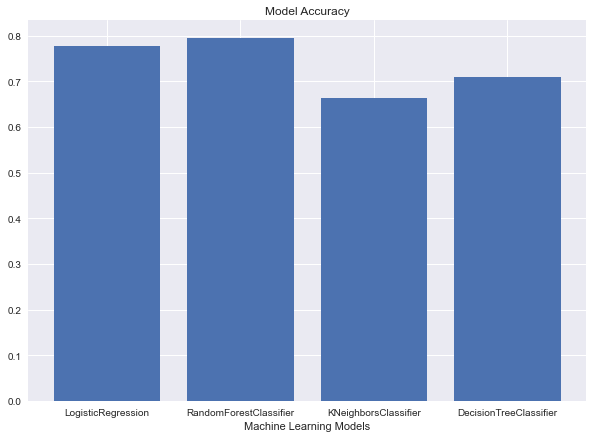

In [30]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(labels,ML_results,label='Accuracy',)
ax.set_xlabel('Machine Learning Models')
ax.set_title('Model Accuracy')